In [64]:
#1. Comprensión del negocio
#a) Objetivo:Predecir con la mayor precisión posible el Importe de Venta Total de cada pedido, utilizando información histórica del sistema ERP
#b) Beneficio:
#Anticipar ingresos
#Tomar decisiones Estratégicas (redireccionar recursos logísticos, cambiar prioridades comerciales o prever caídas de flujo de caja).

In [65]:
#Importación y primer vistazo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Carga
df = pd.read_excel("ventasTotal.xlsx")

# Vista rápida
print(df.shape)
display(df.head())

(1019, 19)


,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste unitario,Importe venta total,Importe Coste total,S01,S02,S03,S04,Venta caida
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,2020-10-12,242113196,2020-11-30,5530,152.58,97.44,843767.40,538843.20,1,0,0,0,0
1,C1908,Europa,Malta,Cárnicos,Online,Alta,2020-01-26,190800607,2020-01-28,994,421.89,364.69,419358.66,362501.86,1,0,0,0,0
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,2020-11-09,765228068,2020-11-21,6845,205.70,117.11,1408016.50,801617.95,1,0,0,0,1
3,C2326,África,Iran,Frutas,Offline,Baja,2021-08-21,232631909,2021-10-02,9806,9.33,6.92,91489.98,67857.52,1,0,0,0,1
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,2022-09-30,530560958,2022-11-12,3633,255.28,159.42,927432.24,579172.86,0,1,0,0,0


In [67]:
# Descripción general
# Tipos y estadísticos básicos
print(df.dtypes)
display(df.describe(include="all").T)

ID Cliente                       object
Zona                             object
País                             object
Tipo de producto                 object
Canal de venta                   object
Prioridad                        object
Fecha pedido             datetime64[ns]
ID Pedido                         int64
Fecha envío              datetime64[ns]
Unidades                          int64
 Precio Unitario                float64
 Coste unitario                 float64
 Importe venta total            float64
 Importe Coste total            float64
S01                               int64
S02                               int64
S03                               int64
S04                               int64
Venta caida                       int64
dtype: object


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID Cliente,1019,951,C3687,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zona,1019,6,África,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
País,1019,184,Greenland,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de producto,1019,12,Cereales,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal de venta,1019,2,Offline,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prioridad,1019,4,Baja,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha pedido,1019,NaN,NaN,NaN,2021-06-19 17:31:23.022571008,2020-01-01 00:00:00,2020-10-18 12:00:00,2021-06-20 00:00:00,2022-02-26 00:00:00,2022-11-07 00:00:00,NaN
ID Pedido,1019.0,NaN,NaN,NaN,542597096.829244,100884807.0,310540425.0,540324628.0,778450071.5,998791825.0,261115280.62553
Fecha envío,1019,NaN,NaN,NaN,2021-07-13 19:42:48.400392448,2020-01-03 00:00:00,2020-11-09 12:00:00,2021-07-16 00:00:00,2022-03-24 12:00:00,2022-12-14 00:00:00,NaN
Unidades,1019.0,NaN,NaN,NaN,5020.593719,1.0,2662.0,5083.0,7455.5,9989.0,2815.424104


In [68]:
#Detección de nulos y duplicados
# Valores faltantes
print(df.isna().sum())

# Duplicados
print("Duplicados:", df.duplicated().sum())

ID Cliente                0
Zona                      0
País                      0
Tipo de producto          0
Canal de venta            0
Prioridad                 0
Fecha pedido              0
ID Pedido                 0
Fecha envío               0
Unidades                  0
 Precio Unitario         34
 Coste unitario          32
 Importe venta total      0
 Importe Coste total      0
S01                       0
S02                       0
S03                       0
S04                       0
Venta caida               0
dtype: int64
Duplicados: 17


In [69]:
#Limpieza
# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# llenamos los valores nulos con la mediana
median_precio = df["Precio Unitario"].median()
median_coste = df["Coste unitario"].median()

df.fillna({"Precio Unitario": median_precio, "Coste unitario": median_coste}, inplace=True)
# Eliminar duplicados
df = df.drop_duplicates()

In [70]:
pivot_País = pd.pivot_table(df, values='Importe venta total', index='País', aggfunc=np.sum)
print("\nVentas por País:\n", pivot_País.head())

pivot_Tipo_producto = pd.pivot_table(df, values='Importe venta total', index='Tipo de producto', aggfunc=np.sum)
print("\nVentas por tipo:\n", pivot_Tipo_producto.head())

pivot_zona = pd.pivot_table(df, values='Importe venta total', index='Zona', aggfunc=np.sum)
print("\nVentas por Zona:\n", pivot_zona)

df.to_csv("ventasTotal.csv", index=False)


Ventas por País:
              Importe venta total
País                            
Afghanistan          11042856.07
Albania               8861299.47
Algeria               1087520.70
Andorra              12149154.73
Angola               11022981.34

Ventas por tipo:
                    Importe venta total
Tipo de producto                      
Alimento infantil         1.102143e+08
Bebida                    2.166795e+07
Cereales                  9.340117e+07
Cosméticos                1.622152e+08
Cuidado personal          3.720186e+07

Ventas por Zona:
                         Importe venta total
Zona                                       
Asia                           1.945291e+08
Australia y Oceanía            1.291364e+08
Centroamérica y Caribe         1.534344e+08
Europa                         2.856462e+08
Norteamérica                   2.796599e+07
África                         4.989587e+08


/tmp/ipython-input-70-3341098570.py:1: FutureWarning: The provided callable <function sum at 0x7cfa42ddd300> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_País = pd.pivot_table(df, values='Importe venta total', index='País', aggfunc=np.sum)
/tmp/ipython-input-70-3341098570.py:4: FutureWarning: The provided callable <function sum at 0x7cfa42ddd300> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_Tipo_producto = pd.pivot_table(df, values='Importe venta total', index='Tipo de producto', aggfunc=np.sum)
/tmp/ipython-input-70-3341098570.py:7: FutureWarning: The provided callable <function sum at 0x7cfa42ddd300> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. T

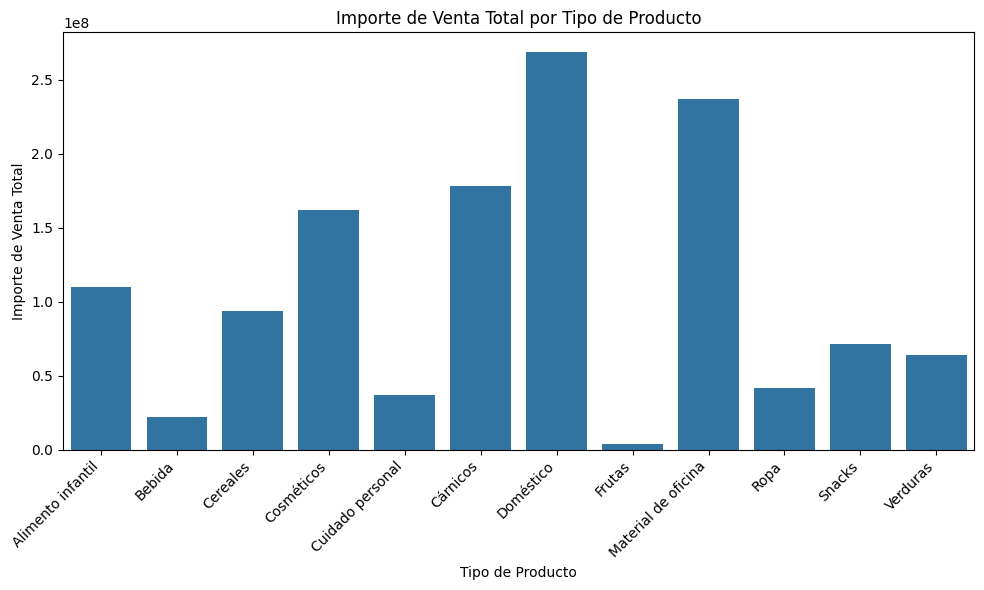

In [71]:
# Gráfico de barras para comparar ventas según el TIPO DE PRODUCTO
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_Tipo_producto.index, y='Importe venta total', data=pivot_Tipo_producto)
plt.title('Importe de Venta Total por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Importe de Venta Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

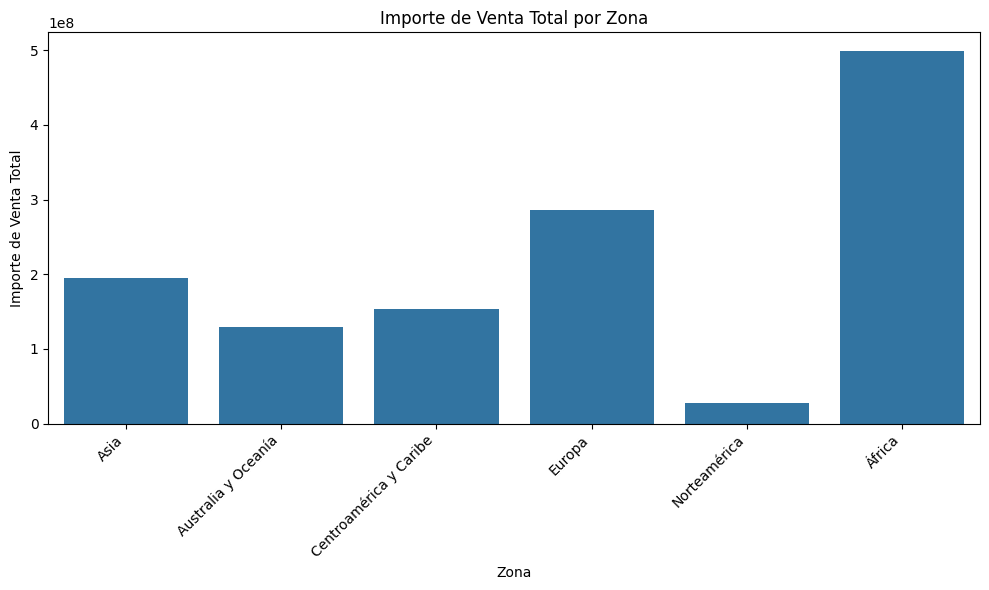

In [72]:
# Gráfico de barras para comparar ventas según la ZONA
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_zona.index, y='Importe venta total', data=pivot_zona)
plt.title('Importe de Venta Total por Zona')
plt.xlabel('Zona')
plt.ylabel('Importe de Venta Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
# Filtramos solamente las ventas de Africa
df_africa = df[df['Zona'] == 'África']
display(df_africa.head())
df_africa.shape

,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste unitario,Importe venta total,Importe Coste total,S01,S02,S03,S04,Venta caida
3,C2326,África,Iran,Frutas,Offline,Baja,2021-08-21,232631909,2021-10-02,9806,9.33,6.92,91489.98,67857.52,1,0,0,0,1
7,C2876,África,Tunisia,Cosméticos,Offline,Media,2020-03-21,287675130,2020-05-07,8319,437.20,263.33,3637066.80,2190642.27,0,1,0,0,0
11,C8904,África,Angola,Snacks,Online,Crítica,2020-05-13,890496671,2020-06-05,6609,152.58,97.44,1008401.22,643980.96,0,0,1,0,0
12,C5218,África,Zambia,Bebida,Offline,Crítica,2021-05-06,521885192,2021-05-22,6281,47.45,31.79,298033.45,199672.99,0,0,0,1,0
13,C4358,África,Kenya,Verduras,Offline,Alta,2020-11-07,435800874,2020-12-25,2018,154.06,90.93,310893.08,183496.74,0,0,1,0,0


(376, 19)

/tmp/ipython-input-74-2734858082.py:7: FutureWarning: The provided callable <function sum at 0x7cfa42ddd300> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_Africa_Tipo_producto = pd.pivot_table(df_africa, values='Importe venta total', index='Tipo de producto', aggfunc=np.sum)
/tmp/ipython-input-74-2734858082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_Africa_Tipo_producto.index, y='Importe venta total', data=pivot_Africa_Tipo_producto, palette='viridis')


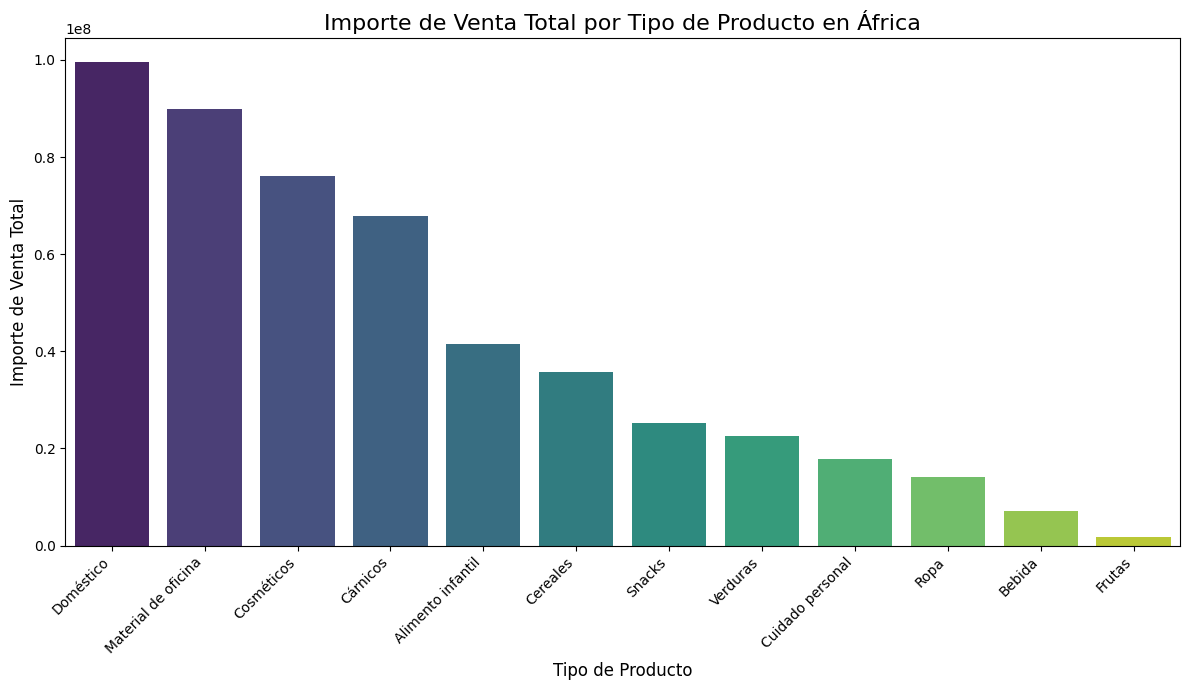

In [74]:
# prompt: Grafico de Barras de ventas según el tipo de producto solo en África

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Creamos una tabla pivote para las ventas por tipo de producto en África
pivot_Africa_Tipo_producto = pd.pivot_table(df_africa, values='Importe venta total', index='Tipo de producto', aggfunc=np.sum)

# Ordenamos los tipos de producto por importe de venta total descendente para mejor visualización
pivot_Africa_Tipo_producto = pivot_Africa_Tipo_producto.sort_values(by='Importe venta total', ascending=False)

# Grafico de barras para comparar ventas por Tipo de Producto en África
plt.figure(figsize=(12, 7))
sns.barplot(x=pivot_Africa_Tipo_producto.index, y='Importe venta total', data=pivot_Africa_Tipo_producto, palette='viridis')
plt.title('Importe de Venta Total por Tipo de Producto en África', fontsize=16)
plt.xlabel('Tipo de Producto', fontsize=12)
plt.ylabel('Importe de Venta Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
# prompt: Realiza un dataframe nuevo con el nombre "Ventas Validas" donde se excluyan las filas en las que se cumple la condición Venta caida=1

Ventas_Validas = df[df['Venta caida'] != 1].copy()

/tmp/ipython-input-76-3253851475.py:7: FutureWarning: The provided callable <function sum at 0x7cfa42ddd300> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_zona_validas = pd.pivot_table(Ventas_Validas, values='Importe venta total', index='Zona', aggfunc=np.sum)
/tmp/ipython-input-76-3253851475.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_zona_validas.index, y='Importe venta total', data=pivot_zona_validas, palette='viridis')


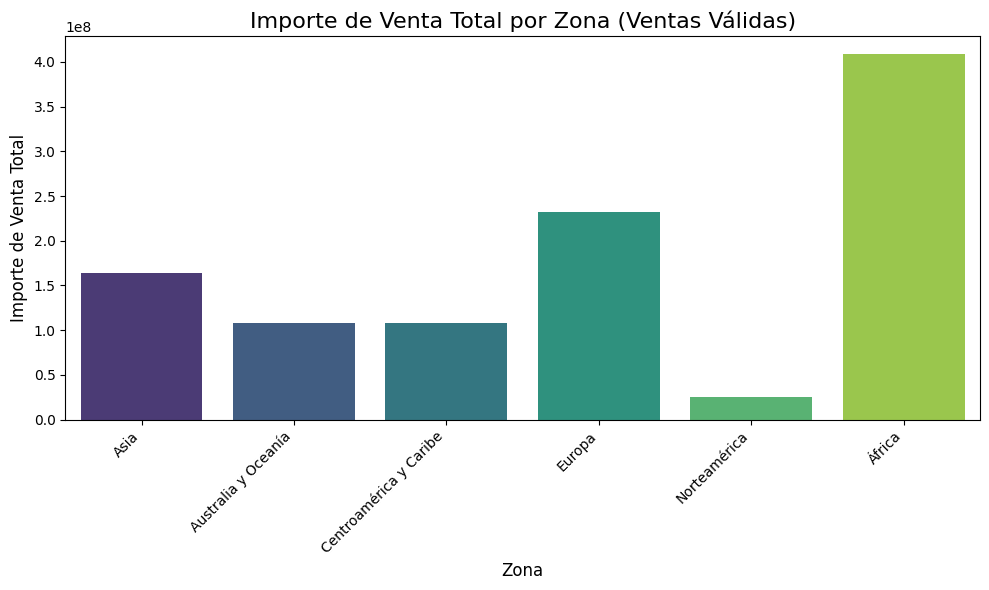

In [76]:
# prompt: Con el dataframe "Ventas_Validas", realiza un comparativo de ventas por zona en un grafico de barras

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Crear una tabla pivote para las ventas por Zona en el dataframe "Ventas_Validas"
pivot_zona_validas = pd.pivot_table(Ventas_Validas, values='Importe venta total', index='Zona', aggfunc=np.sum)

# Gráfico de barras para comparar ventas por Zona en las ventas válidas
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_zona_validas.index, y='Importe venta total', data=pivot_zona_validas, palette='viridis')
plt.title('Importe de Venta Total por Zona (Ventas Válidas)', fontsize=16)
plt.xlabel('Zona', fontsize=12)
plt.ylabel('Importe de Venta Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Importe total de ventas por Sucursal:
 S01    269
S02    272
S03    276
S04    186
dtype: int64


/tmp/ipython-input-77-2698700567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_sucursales_totales.index, y=ventas_sucursales_totales.values, palette='viridis')


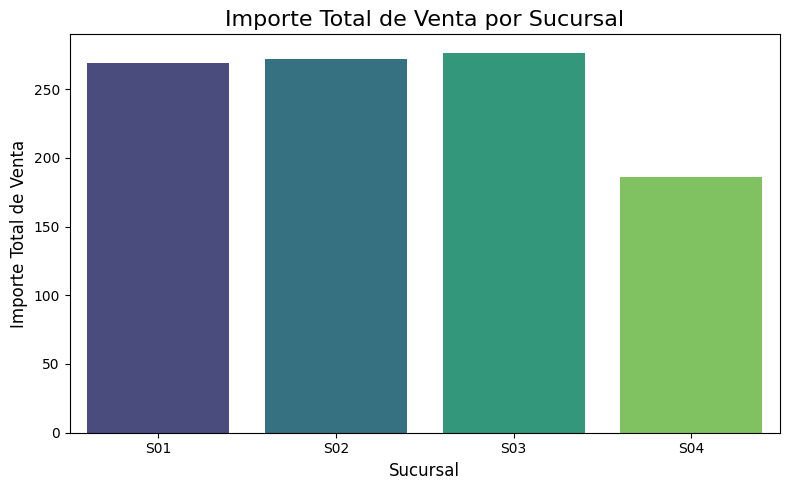

In [77]:
# prompt: Usa el dataframe original, y compara las ventas por sucursal (Columnas S01,S02, S03, S04

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas de las sucursales
sucursales_cols = ['S01', 'S02', 'S03', 'S04']

# Verificar si las columnas existen en el DataFrame
if all(col in df.columns for col in sucursales_cols):
  # Sumar las ventas por sucursal para cada fila (pedido)
  # Esto crea una nueva columna 'Ventas_por_Sucursal' que es la suma de las 4 columnas de sucursales.
  # Si deseas comparar el total de ventas de cada sucursal en todo el dataset, usa sum()
  ventas_sucursales_totales = df[sucursales_cols].sum()

  print("\nImporte total de ventas por Sucursal:\n", ventas_sucursales_totales)

  # Graficar las ventas por sucursal
  plt.figure(figsize=(8, 5))
  sns.barplot(x=ventas_sucursales_totales.index, y=ventas_sucursales_totales.values, palette='viridis')
  plt.title('Importe Total de Venta por Sucursal', fontsize=16)
  plt.xlabel('Sucursal', fontsize=12)
  plt.ylabel('Importe Total de Venta', fontsize=12)
  plt.tight_layout()
  plt.show()
else:
  print("Una o más columnas de sucursal (S01, S02, S03, S04) no se encuentran en el DataFrame.")

# Si quisieras ver las ventas por sucursal para cada pedido individualmente (como una nueva columna):
# df['Ventas_por_Pedido_Sucursales'] = df[sucursales_cols].sum(axis=1)
# print("\nDataFrame con la suma de ventas por sucursal por pedido:\n")
# display(df[['S01', 'S02', 'S03', 'S04', 'Ventas_por_Pedido_Sucursales']].head())


Importe total de ventas por Sucursal (Ventas Válidas):
 S01    224
S02    221
S03    216
S04    154
dtype: int64


/tmp/ipython-input-78-747964656.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_sucursales_validas_totales.index, y=ventas_sucursales_validas_totales.values, palette='viridis')


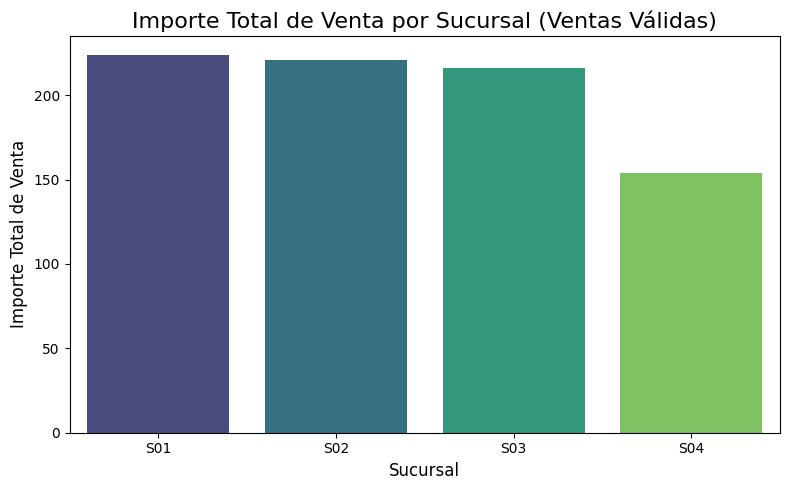

In [78]:
# prompt: Usa el dataframe "Ventas_Validas", y compara las ventas por sucursal (Columnas S01,S02, S03, S04)

import matplotlib.pyplot as plt
# Seleccionar las columnas de las sucursales del dataframe Ventas_Validas
sucursales_cols = ['S01', 'S02', 'S03', 'S04']

# Verificar si las columnas existen en el DataFrame Ventas_Validas
if all(col in Ventas_Validas.columns for col in sucursales_cols):
  # Sumar las ventas por sucursal para todo el dataframe Ventas_Validas
  ventas_sucursales_validas_totales = Ventas_Validas[sucursales_cols].sum()

  print("\nImporte total de ventas por Sucursal (Ventas Válidas):\n", ventas_sucursales_validas_totales)

  # Graficar las ventas por sucursal del dataframe Ventas_Validas
  plt.figure(figsize=(8, 5))
  sns.barplot(x=ventas_sucursales_validas_totales.index, y=ventas_sucursales_validas_totales.values, palette='viridis')
  plt.title('Importe Total de Venta por Sucursal (Ventas Válidas)', fontsize=16)
  plt.xlabel('Sucursal', fontsize=12)
  plt.ylabel('Importe Total de Venta', fontsize=12)
  plt.tight_layout()
  plt.show()
else:
  print("Una o más columnas de sucursal (S01, S02, S03, S04) no se encuentran en el DataFrame Ventas_Validas.")

# Si quisieras ver las ventas por sucursal para cada pedido individualmente en Ventas_Validas:
# Ventas_Validas['Ventas_por_Pedido_Sucursales'] = Ventas_Validas[sucursales_cols].sum(axis=1)
# print("\nDataFrame Ventas_Validas con la suma de ventas por sucursal por pedido:\n")
# display(Ventas_Validas[['S01', 'S02', 'S03', 'S04', 'Ventas_por_Pedido_Sucursales']].head())